In [1]:
# Data downloaded from 10.5281/zenodo.13823014

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import os
import seaborn as sns
from scipy.stats import pearsonr, gaussian_kde

from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density # needed for density scatter plots
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# COLORS:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#440053"),
    (0.2, "#404388"),
    (0.4, "#2a788e"),
    (0.6, "#21a784"),
    (0.8, "#78d151"),
    (1, "#fde624"),
], N=256)
# "Viridis-like" colormap with white background
white_viridis_r = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#fde624"),
    (0.4, "#78d151"),
    (0.6, "#21a784"),
    (0.7, "#2a788e"),
    (0.8, "#404388"),
    (1, "#440053"),
], N=256)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [3]:
# LOAD DATA

SCRATCH = "/Users/adamhe/github/scratch"

# Load model performances
personalized = h5py.File(
    os.path.join(SCRATCH, "evaluation_metric/merged_prediction_0.h5"),
)
reference = h5py.File(
    os.path.join(SCRATCH, "evaluation_metric/merged_reference_prediction_0.h5")
)

PearsonRResult(statistic=0.9798839035825258, pvalue=0.0)

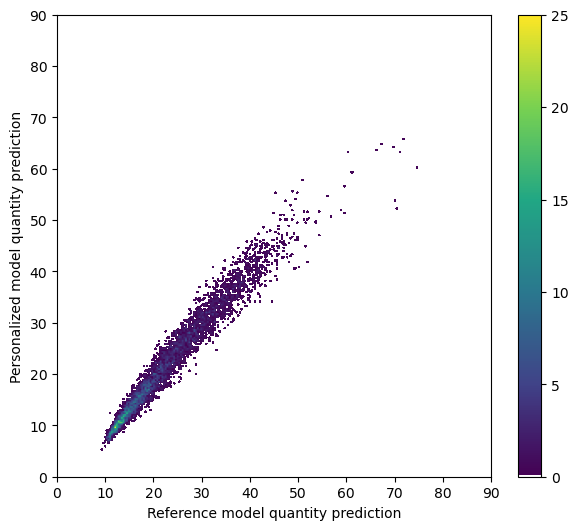

In [5]:
# Plot predicted vs observed quantities

quantity = pd.DataFrame(
    {
        "personalized": personalized["quantity"][:, 0],
        "reference": reference["quantity"][:, 0],
    }
)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1, projection="scatter_density")
density = ax.scatter_density(
    quantity.reference, 
    quantity.personalized,
    cmap=white_viridis
)
fig.colorbar(density)
ax.set_xlim(-0, 90)
ax.set_ylim(-0, 90)
#ax.set_yticks([-0, 1])
#ax.set_yticklabels(["", ""])
#ax.set_xticks([-0, 1])
#ax.set_xticklabels(["", ""])
ax.set_ylabel("Personalized model quantity prediction")
ax.set_xlabel("Reference model quantity prediction")
plt.savefig("img/personalize_v_reference_quantity_prediction.pdf")

pearsonr(quantity.reference, quantity.personalized)

0.9572730275649628


/var/folders/sd/3462tpx12fbfxc_f8swcwyf40000gp/T/ipykernel_56288/1033227076.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  density = sns.distplot(profile, bins=50)


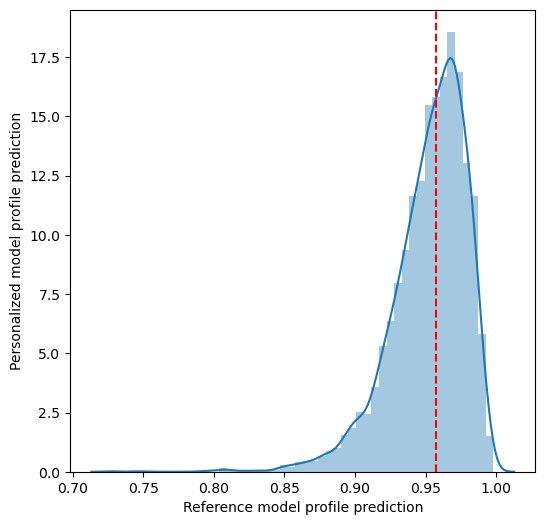

In [12]:
# Plot predicted vs observed profiles

profile = pd.DataFrame(
    personalized["track"][:]
).corrwith(
    pd.DataFrame(reference["track"][:]), axis=1
)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection="scatter_density")
density = sns.distplot(profile, bins=50)
ax.axvline(profile.median(), color="red", linestyle="--")
print(profile.median())
#ax.set_yticks([-0, 1])
#ax.set_yticklabels(["", ""])
#ax.set_xticks([-0, 1])
#ax.set_xticklabels(["", ""])
ax.set_ylabel("Personalized model profile prediction")
ax.set_xlabel("Reference model profile prediction")
plt.savefig("img/personalize_v_reference_profile_prediction.pdf")

0.9572730275649628


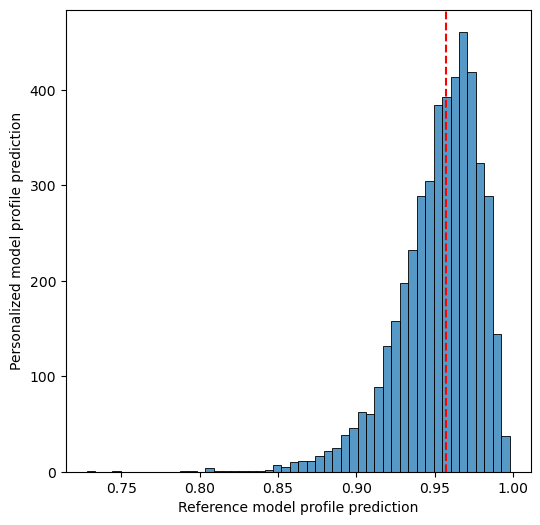

In [13]:
# Plot predicted vs observed profiles

profile = pd.DataFrame(
    personalized["track"][:]
).corrwith(
    pd.DataFrame(reference["track"][:]), axis=1
)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection="scatter_density")
density = sns.histplot(profile, bins=50)
ax.axvline(profile.median(), color="red", linestyle="--")
print(profile.median())
#ax.set_yticks([-0, 1])
#ax.set_yticklabels(["", ""])
#ax.set_xticks([-0, 1])
#ax.set_xticklabels(["", ""])
ax.set_ylabel("Personalized model profile prediction")
ax.set_xlabel("Reference model profile prediction")
plt.savefig("img/personalize_v_reference_profile_prediction_hist.pdf")